In [3]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import random

In [2]:
data = pd.read_csv("Ads_CTR_Optimisation.csv")
data.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


## Thompson Sampling

In [4]:
def thompson_sampling(num_of_rounds, data):
    '''
        The Thompson Sampling function.
        
        Args:
            - num_of_rounds: how many rounds the function should run
            - data: the target data
        
        Return:
            - An array of the selected targets on each round
    '''
    
    ads_count = len(data.columns)
    selected_ads = []
    count_of_rewards_1 = [0] * ads_count
    count_of_rewards_0 = [0] * ads_count
    total_rewards = 0
    for n in range(0, num_of_rounds):
        picked_ad = 0
        max_random_prob = 0
        for ad_id in range(0, ads_count):
            random_prob = random.betavariate(count_of_rewards_1[ad_id] + 1, count_of_rewards_0[ad_id] + 1)
            if random_prob > max_random_prob:
                picked_ad = ad_id
                max_random_prob = random_prob
        
        selected_ads.append(picked_ad)
        reward = data.values[n, picked_ad]
        if reward == 1:
            count_of_rewards_1[picked_ad] += 1
        else:
            count_of_rewards_0[picked_ad] += 1
        
        total_rewards += reward
    
    return selected_ads    

- We run the thompson sampling function multiple times with differnt round count
- We start with 100 rounds
- Each time we increase the number of rounds by 100
- The loop ends when the rounds earch the number of data records

The reason is that thompson sampling is based on **exploration and exploitation**. This means in reality, we cannot expect to run the model for 10k (for all data records). We need to make a decision as soon as possible.

In [5]:
# number of users (rounds)
N_final = len(data)
initial_N = 100
step = 100
selected_ads_history = []
rounds = []
for N in range(initial_N, N_final + 1, step):
    selected_ads_history.append(thompson_sampling(N, data))
    rounds.append(N)

## Results

First, let's see which Ad was the most selected by Thompson Sampling in overall (10k rounds) 

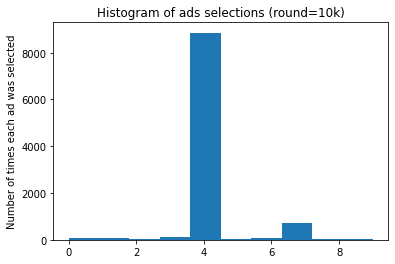

In [6]:
plt.hist(selected_ads_history[len(selected_ads_history) - 1])
plt.title('Histogram of ads selections (round=10k)')
plt.ylabel('Number of times each ad was selected')
plt.show()

Now, let's see which Ad was the most selected by Thompson Sampling in initially for round==100

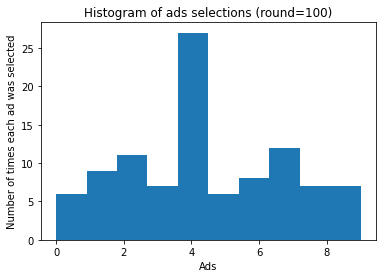

In [7]:
plt.hist(selected_ads_history[0])
plt.title('Histogram of ads selections (round=100)')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

- **We can see that even initially Thompson Sampling picked the right Ad (4).**